In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

from create_specsII import create_spec
from fit2gaussII import fit2gauss
from test_fit import test_fit

In [5]:
# import arrays
tube = readsav('/Users/WilliamHenryAshfieldIV/spring2020/dat/f1.sav',verbose=False,python_dict=False)
frac = readsav('/Users/WilliamHenryAshfieldIV/spring2020/dat/f4_si_iv_nei.sav',verbose=False,python_dict=False)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/spring2020/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [80]:
wav,spec,error = create_spec(tube,frac,log10T,log10G,time=97)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


(1402, 1405)

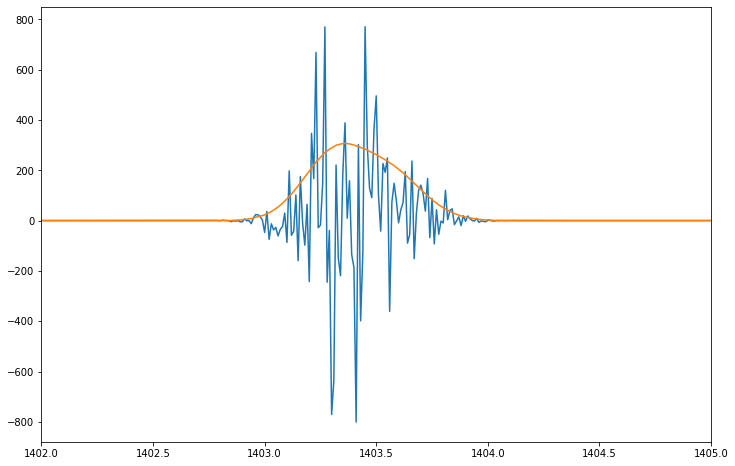

In [81]:
errorII = np.sqrt(spec)
np.nan_to_num(errorII, copy=False, nan=0)
plt.figure(figsize=(12,8))
plt.plot(wav,error)
plt.plot(wav,errorII)
plt.xlim(1402,1405)

In [82]:
#error += 0.0001
#rando = np.random.randn(2000)*0.01
#too_small = np.where(errorII < 0.0001)

rando = np.random.randn(2000)*0.01*np.max(spec) #
too_small = np.where(errorII < 0.1*np.max(spec))
errorII += rando

In [83]:
#error += 0.0001
rando = np.random.randn(2000)*0.01
too_small = np.where(error < 0.0001)
error += rando

In [84]:
#noise = np.full(2000,0.001)
res = fit2gauss(wav,spec,errorII,verbose=True)

a2g[0] = 77161.04678206368
a1g[0] = 93210.62105701618
chi2g =  0.44057121526193377
a2g =  [7.71610468e+04 1.40332473e+03 1.03796366e-01 5.06229251e+04
 1.40351677e+03 1.17917718e-01]
chi1g =  353.90194983607097
chi2g =  0.44057121526193377


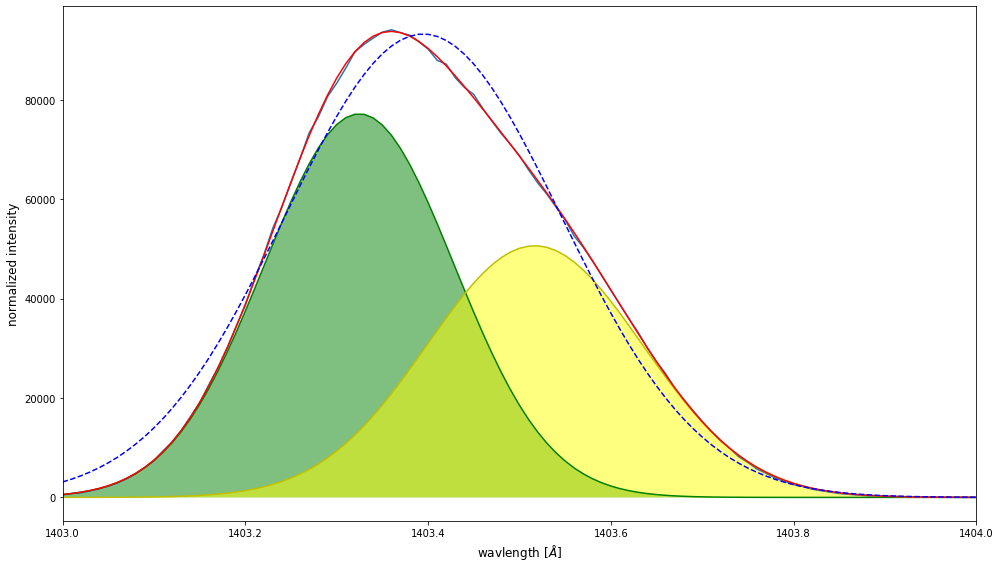

In [85]:
# extract arrays
y2a = res["y2a"]
y2b = res["y2b"]
y1g = res["y1g"]

#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectra
ax1.plot(wav, spec)



# peak 1
ax1.plot(wav, y2a, "g")
ax1.fill_between(wav, y2a.min(), y2a, facecolor="green", alpha=0.5)
  
# peak 2
ax1.plot(wav, y2b, "y")
ax1.fill_between(wav, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 

#both
ax1.plot(wav,y2a+y2b, "r")

# single fit
ax1.plot(wav,y1g,'b--')
    
plt.xlim(1403,1404)

ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
ax1.set_ylabel("normalized intensity",  fontsize=12)

fig.tight_layout()

In [55]:
a1g = res["a1g"]
a2g = res["a2g"]

line = 1403
l1 = a2g[1]
l2 = a2g[4]
v1 = (l1-line)/line*3e5
v2 = (l2-line)/line*3e5


print('red velocity = ',v1,'-----', '"blue" velocity = ', v2)

red velocity =  52.33233026666673 ----- "blue" velocity =  52.33233026666673


In [16]:
# single Gaussian
line = 1403
l1 = a1g[1]
v1 = (l1-line)/line*3e5
print('red velocity = ',v1)

red velocity =  107.62353395206193
